# 生境聚类-Kmeans

In [1]:
import nibabel as nib
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

E:\Tools\anaconda3\envs\monai\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Step 1: 加载原始MRI图像和已勾画的ROI
mri_file_path = r'E:\test\habitat_test\18_0_CE_2.nii'
roi_file_path = r'E:\test\habitat_test\18_0_label.nii'

mri_data = nib.load(mri_file_path).get_fdata()
roi_data = nib.load(roi_file_path).get_fdata()

assert mri_data.shape == roi_data.shape, "MRI and ROI dimensions do not match"

In [3]:
# Step 2: 提取3D ROI区域内的数据
roi_indices = np.where(roi_data > 0)
roi_features = mri_data[roi_indices].reshape(-1, 1)

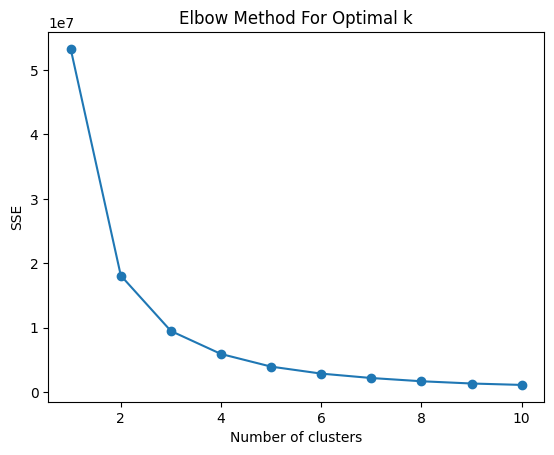

In [4]:
# Step 3: 使用肘部法则确定最佳聚类数量
sse = []
for k in range(1, 11):  # 测试1到10的聚类数量
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(roi_features)
    sse.append(kmeans.inertia_)

# 绘制肘部图形
plt.figure()
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
# 根据肘部图形选择最佳聚类数量，这里需要人工观察决定
optimal_clusters = 4  # 假设最佳聚类数量为4

In [6]:
# # Step 4: 应用聚类算法进行生境分析
# n_clusters = 3  # 定义聚类数量
# kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(roi_features.reshape(-1, 1))

# # 获取聚类标签
# labels = kmeans.labels_

# # 重建3D ROI以展示聚类结果
# clustered_roi = np.zeros_like(roi_data)
# clustered_roi[roi_indices] = labels + 1  # 使用+1以避免标签为0

# Step 4: 应用聚类算法并保存聚类结果
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0).fit(roi_features)
labels = kmeans.labels_

# 重建3D ROI以展示聚类结果
clustered_roi = np.zeros_like(roi_data)
clustered_roi[roi_indices] = labels + 1

In [7]:
# Step 5: 保存分割后的子ROI为NIfTI格式
new_roi_img = nib.Nifti1Image(clustered_roi, affine=nib.load(mri_file_path).affine)
new_roi_file_path = r'E:\test\habitat_test\subroi.nii'
nib.save(new_roi_img, new_roi_file_path)